In [1]:
#importing essential libaries 
import numpy as np
import pandas as pd 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from IPython.display import HTML

In [3]:
# Loading the data 
df=pd.read_csv('C:/Users/hp/OneDrive/Desktop/TCS/project/US_Accidents_March23.csv')


In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
HTML("<h1 style='font-size:24px;'>Exploring the dataset</h1>")

In [6]:
df.shape

(7728394, 46)

In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [10]:
print("\033[1mThe data has 14 numeric columns while the rest are categorical variables.\033[0m")


The data has 14 numeric columns while the rest are categorical variables.


In [11]:
df.isna()   #Converts everythings to True(if there are missing values),false otherwise 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isna().sum().sort_values(ascending = False)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [13]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages
#sort out the ones with zeroes
missing_percentages[missing_percentages != 0]


End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

Text(0.5, 1.0, 'Share of Missing Values per Columns')

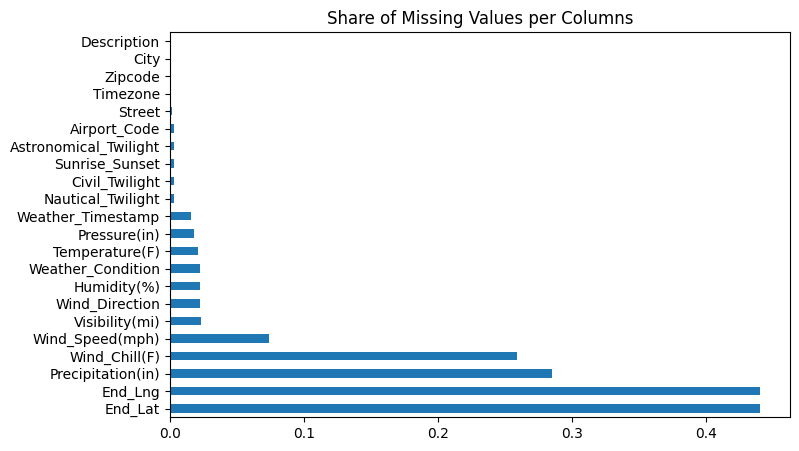

In [14]:
ax = missing_percentages[missing_percentages != 0].plot(kind='barh', figsize=(8, 5))
ax.set_title("Share of Missing Values per Columns")




In [15]:
HTML("<h1 style='font-size:24px;'>Data Analysis and Visualization</h1>")

In [16]:
print("\033[1mState\033[0m")

State


In [17]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object

In [18]:
states_by_accident=df.State.value_counts()
# Top Ten States by accidents
states_by_accident[:10]

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: State, dtype: int64

Text(0.5, 1.0, 'Top Ten States By Accident')

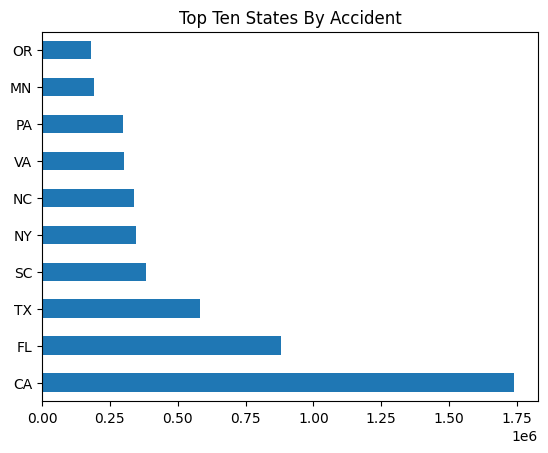

In [19]:
ax=states_by_accident[:10].plot(kind = 'barh')
ax.set_title('Top Ten States By Accident')

In [20]:
print("\033[1mCity\033[0m")

City


In [21]:
#pull out the column
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [22]:
#look at the unique values of the column
df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [23]:
cities=df.City.unique()
len(cities) # of cities to be analyzed 

13679

In [24]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

Text(0.5, 1.0, 'Top 30 cities by the number of accidents')

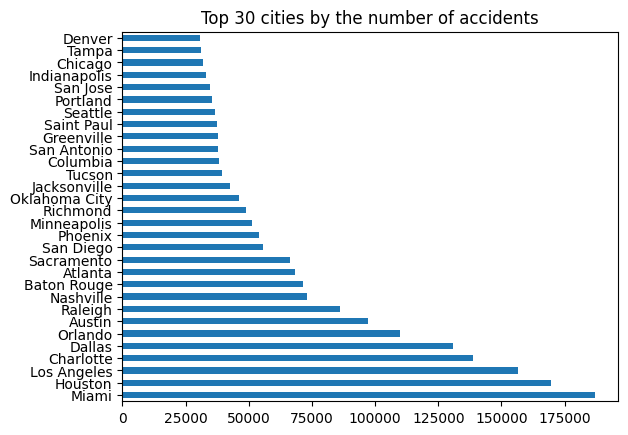

In [25]:
ax=cities_by_accident[:30].plot(kind='barh')
ax.set_title('Top 30 cities by the number of accidents')

Text(0.5, 1.0, 'Distribuations of cities by number of accidents')

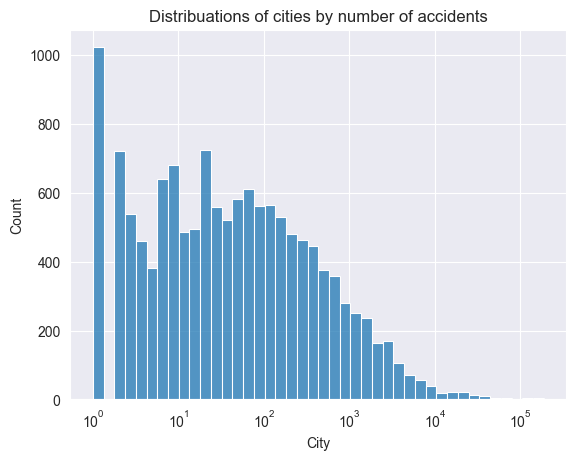

In [26]:
sns.set_style("darkgrid")
#plotting a hitogram with a logarithmic scale
ax=sns.histplot(cities_by_accident, log_scale=True)
ax.set_title('Distribuations of cities by number of accidents')

In [27]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]

In [28]:
low_accident_cities=cities_by_accident[cities_by_accident<1000]

In [29]:
len(high_accident_cities)/len(cities)

0.08904159660793917

Text(0.5, 1.0, 'Distrubation of cities with accidents>=1000')

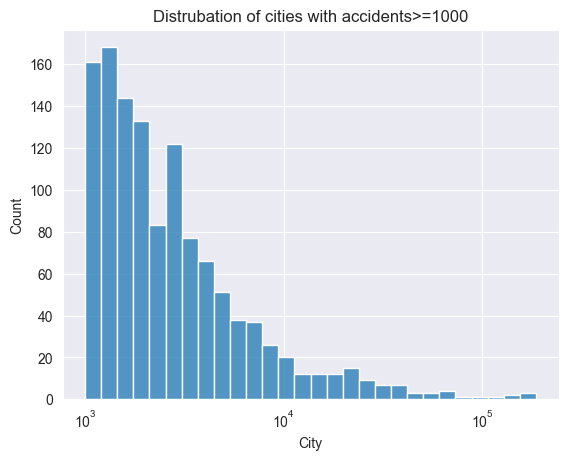

In [30]:
ax=sns.histplot(high_accident_cities,log_scale=True)
ax.set_title('Distrubation of cities with accidents>=1000')


Text(0.5, 1.0, 'Distribution of cities having<1000 accidents ')

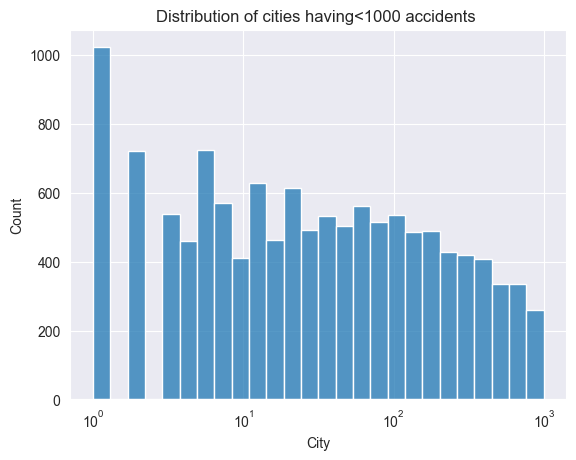

In [31]:
ax=sns.histplot(low_accident_cities,log_scale=True)
ax.set_title('Distribution of cities having<1000 accidents ')

In [32]:
#pull the column from the data 
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [33]:
#convert to timestamp type and override the original column
df.Start_Time=pd.to_datetime(df.Start_Time)

In [34]:
#extract hour from timestamp
df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\2904231315.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)


Text(0.5, 1.0, 'Distribution of accidents in 24 hours')

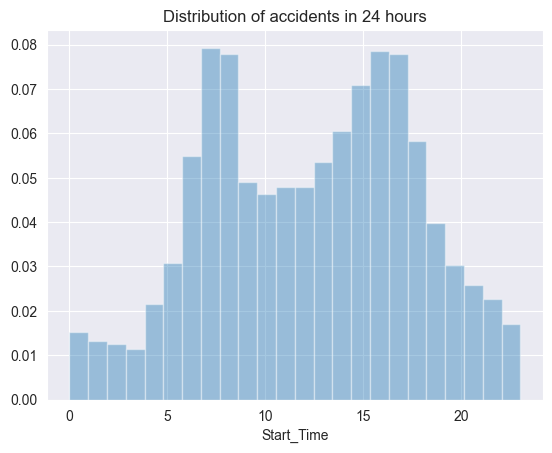

In [35]:
ax=sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)
ax.set_title('Distribution of accidents in 24 hours')

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\214370715.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)


Text(0.5, 1.0, 'Distribution of accidents on Monday')

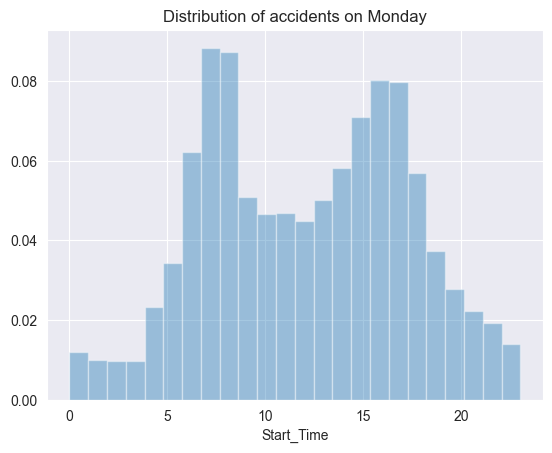

In [36]:
#pull the day of the week from the timestamp format
monday_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==0]

#plot the distribution 
ax=sns.distplot(monday_start_time.dt.hour,bins=24,kde=False,norm_hist=True)
ax.set_title('Distribution of accidents on Monday')

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\3933281201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sundays_start_time.dt.hour, bins=24,kde=False,norm_hist=True)


Text(0.5, 1.0, 'Distribution of accidents on Sunday')

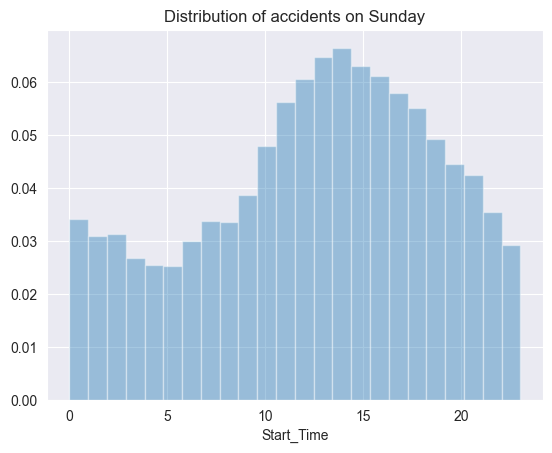

In [37]:
sundays_start_time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
ax=sns.distplot(sundays_start_time.dt.hour, bins=24,kde=False,norm_hist=True)
ax.set_title('Distribution of accidents on Sunday')

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\3867104672.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df.Start_Time.dt.month, bins = 12,kde=False,norm_hist=True)


Text(0.5, 1.0, 'Over-all month wise distribution')

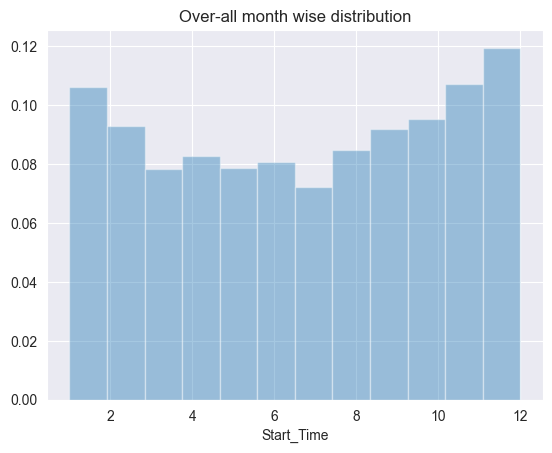

In [38]:
#plot for months
ax= sns.distplot(df.Start_Time.dt.month, bins = 12,kde=False,norm_hist=True)
ax.set_title('Over-all month wise distribution')

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\1948649905.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_2016.Start_Time.dt.month, bins = 12,kde=False,norm_hist=True)


Text(0.5, 1.0, 'Year_2016')

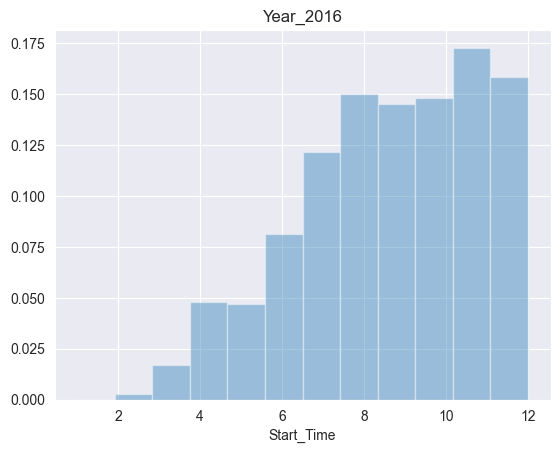

In [39]:
#2016
df_2016=df[df.Start_Time.dt.year==2016]
ax=sns.distplot(df_2016.Start_Time.dt.month, bins = 12,kde=False,norm_hist=True)
ax.set_title("Year_2016")

C:\Users\hp\AppData\Local\Temp\ipykernel_28100\2583254232.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_2019.Start_Time.dt.month, bins = 12,kde=False,norm_hist=True)


Text(0.5, 1.0, 'Year_2019')

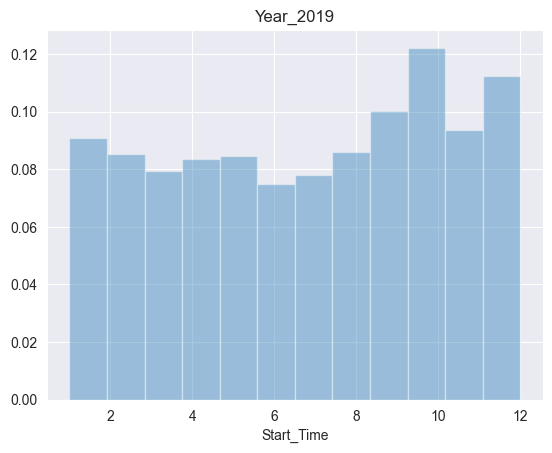

In [40]:
#2019
df_2019=df[df.Start_Time.dt.year==2019]
ax=sns.distplot(df_2019.Start_Time.dt.month, bins = 12,kde=False,norm_hist=True)
ax.set_title("Year_2019")

In [41]:
print("\033[1mTemperature\033[0m")

Temperature


In [42]:
#pull out the column with its frequency distribution
df['Temperature(F)'].value_counts()

 77.0     170991
 73.0     170898
 68.0     163767
 72.0     160498
 75.0     158448
           ...  
 1.6           1
-21.5          1
 127.0         1
 158.0         1
 132.6         1
Name: Temperature(F), Length: 860, dtype: int64

Text(0.5, 1.0, 'Distribution of Temperature')

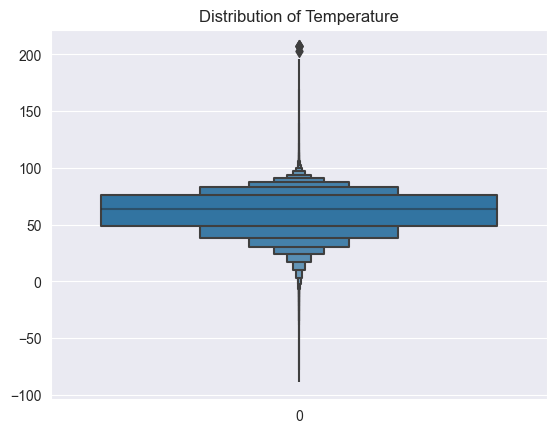

In [43]:
ax=sns.boxenplot(df['Temperature(F)'])
ax.set_title('Distribution of Temperature')


In [44]:
print("\033[1mWeather Condition\033[0m")

Weather Condition


In [45]:
df.Weather_Condition.value_counts()

Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: Weather_Condition, Length: 144, dtype: int64

In [46]:
data=df['Weather_Condition'].value_counts().to_dict()

In [47]:
wc=WordCloud(width=900,height=800,background_color='white',min_font_size=10).generate_from_frequencies(data)


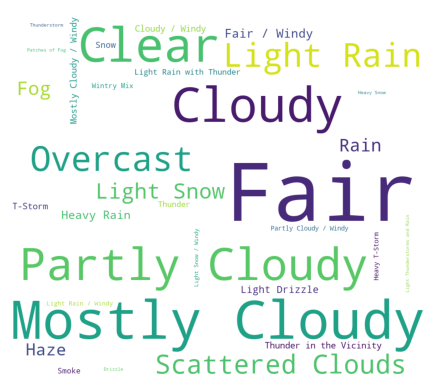

In [48]:
plt.imshow(wc)
plt.axis('off')
plt.show()

In [49]:
print("\033[1mVisibility\033[0m")

Visibility


Text(0.5, 1.0, 'Frequency of accidents by visibility (miles)')

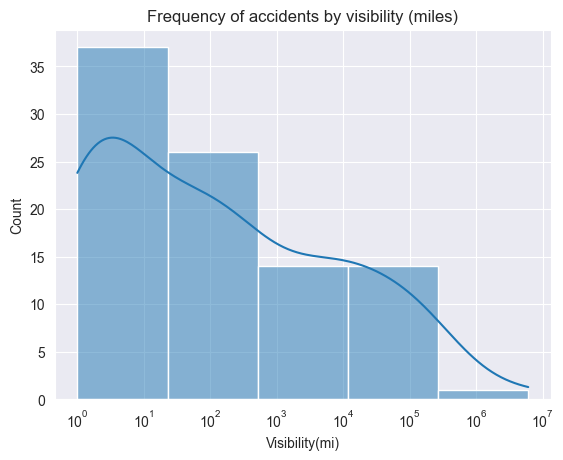

In [50]:
ax=sns.histplot(df['Visibility(mi)'].value_counts(),bins=5,kde=True,log_scale=True)
ax.set_title('Frequency of accidents by visibility (miles)')

In [51]:
print("\033[1mCrossing\033[0m")

Crossing


<Axes: title={'center': 'Presence of a crossing'}, ylabel='Crossing'>

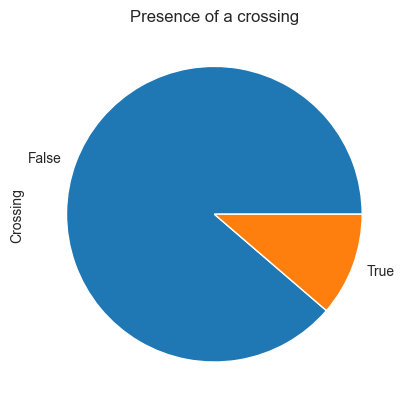

In [52]:
df['Crossing'].value_counts().plot(kind='pie',title='Presence of a crossing')

In [53]:
print("\033[1mTraffic Signal\033[0m")

Traffic Signal


<Axes: title={'center': 'Presence of a traffic signal nearby'}, ylabel='Traffic_Signal'>

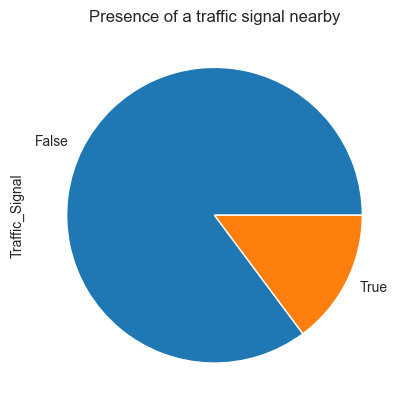

In [54]:
df['Traffic_Signal'].value_counts().plot(kind='pie',title='Presence of a traffic signal nearby')

In [55]:
print("\033[1mBump\033[0m")

Bump


<Axes: title={'center': 'Presence of a bump nearby'}, ylabel='Bump'>

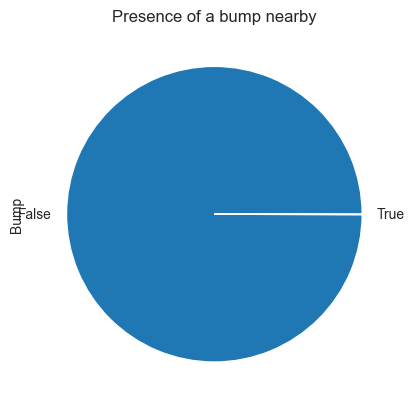

In [56]:
df['Bump'].value_counts().plot(kind='pie',title='Presence of a bump nearby')